<a href="https://colab.research.google.com/github/jaymahapatra/IST-719-Week-9-Machine-Learning-II/blob/master/Lab_9_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
###Using GPU
##TensorFlow and tf.keras
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [0]:
##Load fashion Mnist from the Keras Data Set 
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
##Add class names to the images after doing research on the Fashion MNEST data set
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [36]:
##Look at the shape of the Train Data Set
train_images.shape

(60000, 28, 28)

In [37]:
##Look at the shape of the Test Data Set
test_images.shape

(10000, 28, 28)

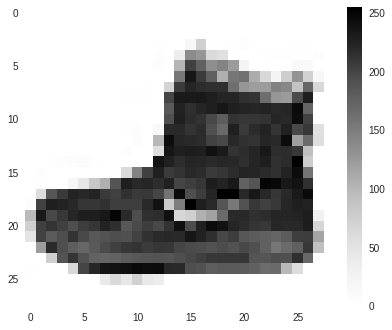

In [38]:
##Look at sample image to see pixel size
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
##Reshape Pixel to between 0 and 1 in Training and Test Set
train_images = train_images / 255.0

test_images = test_images / 255.0

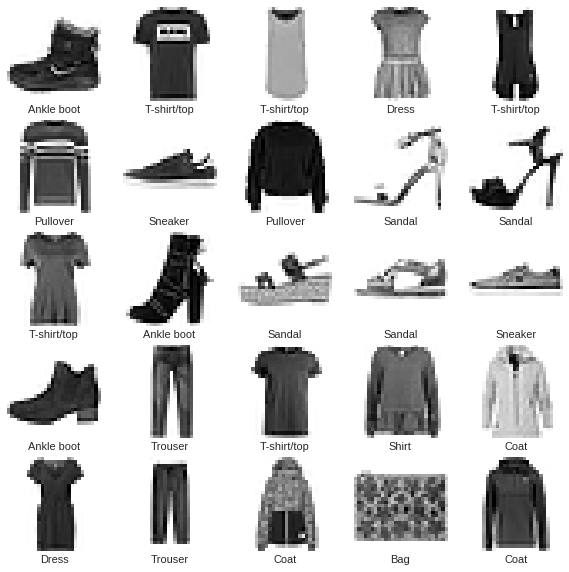

In [40]:
#Plot the first 25 images in the train data set with the class labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
##set up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
##compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
##Train Model
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4998 - acc: 0.8248
Epoch 2/25
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3743 - acc: 0.8647
Epoch 3/25
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3363 - acc: 0.8771
Epoch 4/25
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3105 - acc: 0.8864
Epoch 5/25
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2922 - acc: 0.8922
Epoch 6/25
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2784 - acc: 0.8963
Epoch 7/25
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2656 - acc: 0.9007
Epoch 8/25
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2548 - acc: 0.9043
Epoch 9/25
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2467 - acc: 0.9074
Epoch 10/25
60000/60000 [==============================] - 7s 118us/sampl

In [44]:
##Evaluate Test Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3748 - acc: 0.8878
Test accuracy: 0.8878


In [45]:
##Make predictions in the test set/Look ata ccuracy across variables/ look at which variable had the highest prediction rate
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[2.0367446e-08 6.5533788e-17 1.2175622e-13 3.9691036e-14 4.4522984e-13
 1.2271278e-06 4.6849102e-13 9.0643245e-04 1.7236020e-11 9.9909234e-01]
9
9


In [0]:
##Look at Accuracy
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

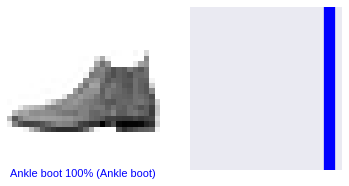

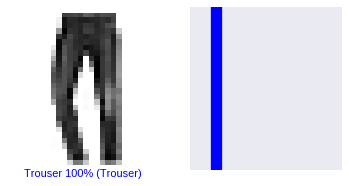

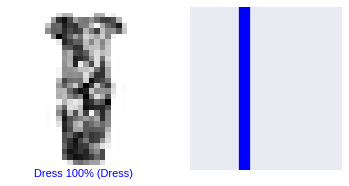

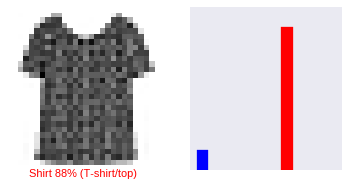

In [47]:
##Look how the model predicted different out comes
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

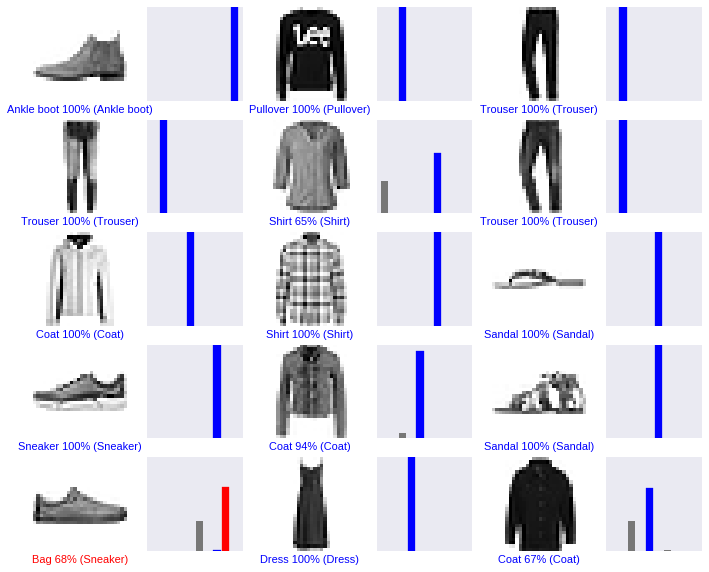

In [48]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[2.0367525e-08 6.5533536e-17 1.2175692e-13 3.9691036e-14 4.4522900e-13
  1.2271347e-06 4.6848923e-13 9.0643117e-04 1.7236053e-11 9.9909234e-01]]


9

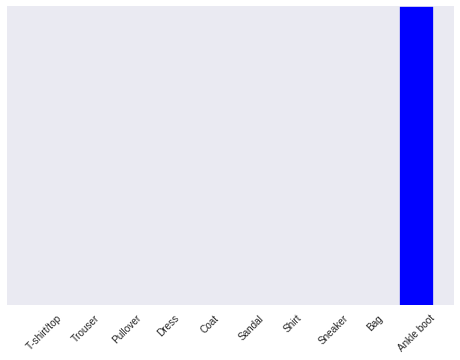

In [49]:
#Use the trained model to make a prediction about a single image
#Grab an image from the test dataset
#Add the image to a batch where it's the only member
#Make prediction
img = test_images[0]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])